<a href="https://colab.research.google.com/github/Gabriel-Paes/ml-mental-health/blob/main/A3_Mental_Heath_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto A3 - Inteligência Artificial**

###**Projeto: Predição de hitorico de saude mental**

---


### **Introdução**

Neste projeto, nosso objetivo é desenvolver um algoritmo de previsão de histórico de saúde mental utilizando técnicas de aprendizado de máquina. Especificamente, empregaremos o algoritmo de classificação Random Forest Classifier para analisar e prever padrões de saúde mental com base em dados fornecidos.

A saúde mental é uma área de crescente importância na sociedade moderna, e a capacidade de prever problemas potenciais pode auxiliar na tomada de decisões proativas e na implementação de intervenções precoces. O Random Forest Classifier, com sua capacidade de manejar grandes volumes de dados e capturar relações complexas entre variáveis, é uma ferramenta robusta e apropriada para esta tarefa.

No decorrer deste projeto, abordaremos as seguintes etapas:




Estamos empolgados com o potencial deste projeto em contribuir para o campo da saúde mental e esperamos que nossos esforços resultem em um modelo útil e aplicável para prever e, eventualmente, melhorar a saúde mental de indivíduos.



### **Importação das dependencias**

Estamos ultilizando as bibliotecas:


*   Pandas
*   Numpy
*   Seaborn
*   Matplotlib
*   Bibliotecas do sklearn



In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score



### **Dataset**

Importamos a dataset **Mental Health Dataset** da plataforma KAGGLE.

Link do dataset: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset/data


In [159]:
# Importando a dataset
data = pd.read_csv('https://raw.githubusercontent.com/Gabriel-Paes/ml-mental-health/main/dataset/mental_health_dataset.csv')
display(data)

# Gerando uma copía do dataset para futuras aplicações
dataset = data.copy()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192359,8/27/2014 16:15,Male,Germany,Business,No,Yes,Yes,More than 2 months,Maybe,Maybe,No,High,Yes,Maybe,Yes,No,Not sure
192360,8/27/2014 16:17,Male,United States,Business,No,No,No,More than 2 months,Maybe,Maybe,No,High,Yes,Maybe,Yes,Maybe,Not sure
192361,8/27/2014 16:21,Male,United States,Business,Yes,Yes,Yes,More than 2 months,Maybe,Maybe,No,High,Yes,Maybe,Yes,No,Yes
192362,8/27/2014 16:21,Male,Israel,Business,No,No,No,More than 2 months,Maybe,Maybe,No,High,Yes,Maybe,Yes,No,No


In [161]:
# Converta colunas categóricas em valores numéricos
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

# 0 = Talvez
# 1 = Não
# 2 = Sim

In [162]:
# Definir as features (X) e o target (y)
target = 'Mental_Health_History'
X = data.drop(target, axis=1)
y = data[target]

In [163]:
# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [164]:
# Pré-processamento dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###**Treinamento do modelo**

Utilizaremos o Random Forest Classifier para treinar um modelo preditivo com base nos dados preparados.

In [165]:
# Treinar um modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [166]:
# Fazer predições no conjunto de teste
y_pred = model.predict(X_test)

###**Avaliação do Modelo**

Avaliaremos o desempenho do modelo utilizando métricas apropriadas para garantir sua eficácia.


In [167]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.9816322994281753
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20270
           1       0.99      0.99      0.99     18777
           2       0.97      0.97      0.97     18663

    accuracy                           0.98     57710
   macro avg       0.98      0.98      0.98     57710
weighted avg       0.98      0.98      0.98     57710



In [168]:
# Selecionando um subconjunto aleatório de 1000 amostras de teste
indices = np.random.choice(len(y_test), size=1000, replace=False)
y_test_subset = y_test.sample(n=1000)
y_pred_subset = y_pred[indices]

###**Análise de Dados: Graficos**

Analisaremos os dados e geraremos graficos para entender melhor as características e relações presentes.

#### **Matriz de confusão**

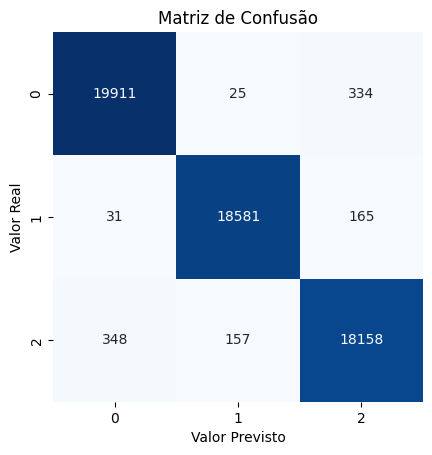

Acurácia: 0.9816322994281753


In [169]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Obtendo os valores da matriz de confusão
#tn, fp, fn, tp = cm.ravel()

# Plotando a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibindo a acurácia
print('Acurácia:', accuracy)

#### **Importância das features**

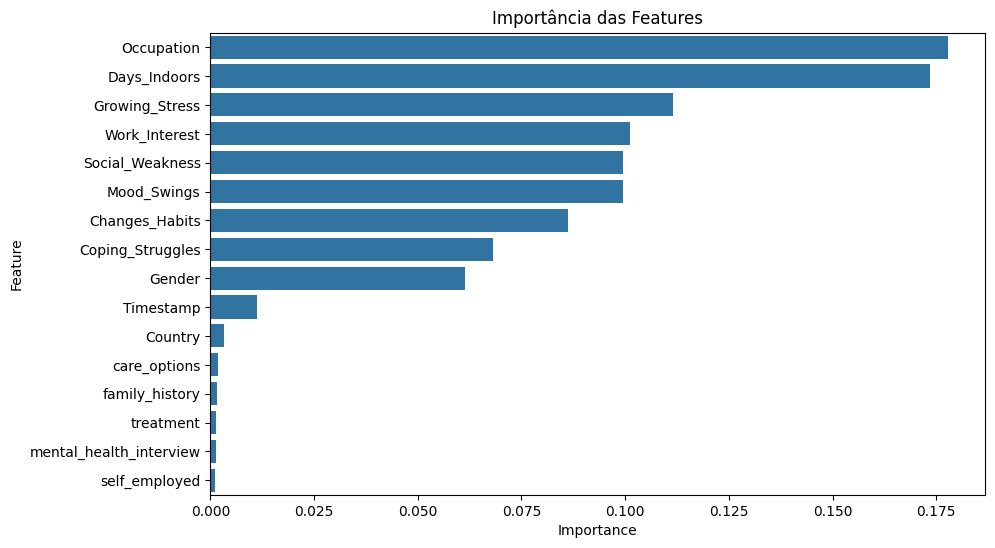

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importância das features
importances = model.feature_importances_
feature_names = X.columns

# Criar um DataFrame para visualização
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Features')
plt.show()


#### **Curva de aprendizado**

05 Minutos para plotar


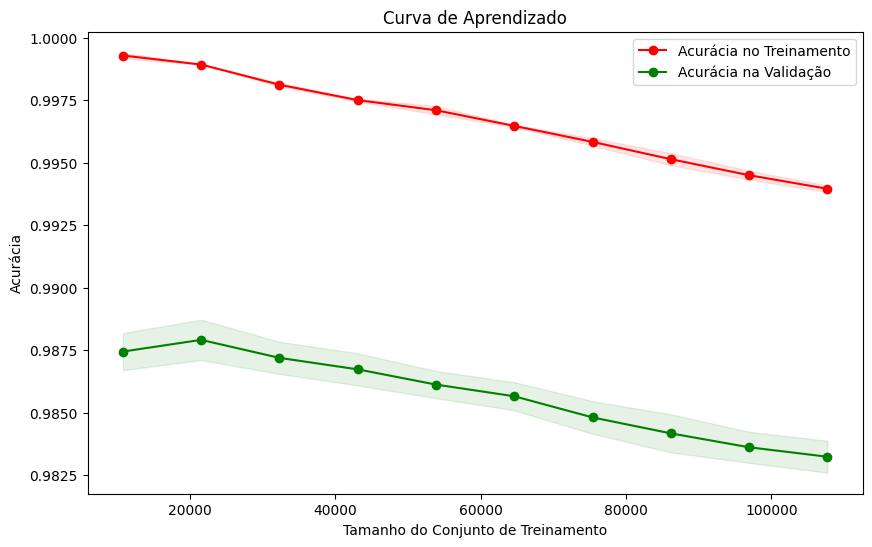

In [ ]:
from sklearn.model_selection import learning_curve

# Calcular a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular média e desvio padrão dos scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Acurácia no Treinamento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Acurácia na Validação')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curva de Aprendizado')
plt.legend(loc='best')
plt.show()


###**Implementação e Testes**

Implementaremos o modelo final e testaremos sua capacidade de prever novos dados de forma precisa.


In [176]:
# Função para pré-processar os dados da pessoa específica.
# Parâmetros:
  # person_data: um DataFrame contendo os dados da pessoa específica.
  # objeto StandardScaler ajustado aos dados de treinamento.
  # columns: as colunas que o modelo espera.
def preprocess_data(person_data, scaler, columns):

    # Certificar-se de que person_data é um DataFrame e contém todas as colunas esperadas
    person_data = pd.DataFrame([person_data])
    person_data = person_data[columns]

    # Aplicar o scaler aos dados da pessoa
    person_data_scaled = scaler.transform(person_data)

    # Retorna: DataFrame pré-processado.
    return person_data_scaled

# Função para prever a saúde mental de uma pessoa específica usando um modelo RandomForest treinado.
# Parâmetros:
  # model: o modelo RandomForestClassifier treinado.
  # person_data: um dicionário ou DataFrame contendo os dados da pessoa específica.
  # scaler: objeto StandardScaler ajustado aos dados de treinamento.
  # columns: as colunas que o modelo espera.
def prever_mental_health(model, person_data, scaler, columns):

    # Se person_data for uma Series, convertê-la para um DataFrame
    if isinstance(person_data, pd.Series):
        person_data = person_data.to_dict()

    # Pré-processar os dados da pessoa
    person_data_scaled = preprocess_data(person_data, scaler, columns)

    # Fazer a previsão nominal
    predicted_class = model.predict(person_data_scaled)[0]

    # Obter as probabilidades das classes
    predicted_probabilities = model.predict_proba(person_data_scaled)[0]


    # Retorna: Um dicionário contendo a classe prevista e as probabilidades das classes.
    return {
        'predicted_class': predicted_class,
        'predicted_probabilities': predicted_probabilities
    }

# Exemplo de uso
# Dados de uma pessoa no DataFrame
user_index = 484  # Substitua pelo índice da pessoa desejada

person_data = data.iloc[user_index]

# Assegure-se de que 'columns' contenha as colunas na ordem correta
columns = X.columns.tolist()

# Previsão para a primeira pessoa
resultado = prever_mental_health(model, person_data, scaler, columns)
print(f"A previsão de saúde mental para essa pessoa é: {resultado['predicted_class']}")

map_target = {
    0: 'Talvez',   # 0 = Talvez
    1: 'Não',      # 1 = Não
    2: 'Sim'       # 2 = Sim
}

for index, probability in enumerate(resultado['predicted_probabilities']):
  print(f"A probabilidade para {index} - {map_target.get(index)} é: {100 * probability:.2f}%")


A previsão de saúde mental para essa pessoa é: 0
A probabilidade para 0 - Talvez é: 50.00%
A probabilidade para 1 - Não é: 33.00%
A probabilidade para 2 - Sim é: 17.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [177]:
display(dataset.iloc[user_index])

Timestamp                  8/27/2014 11:29
Gender                              Female
Country                      United States
Occupation                         Student
self_employed                          NaN
family_history                          No
treatment                              Yes
Days_Indoors                     1-14 days
Growing_Stress                         Yes
Changes_Habits                       Maybe
Mental_Health_History                Maybe
Mood_Swings                           High
Coping_Struggles                        No
Work_Interest                           No
Social_Weakness                        Yes
mental_health_interview                 No
care_options                      Not sure
Name: 484, dtype: object

In [174]:
# Encontrar o primeiro índice onde a coluna Mental_Health_History seja 0
first_index = data.loc[data['Mental_Health_History'] == 0].index[0]

# Exibir o índice encontrado
print(f"O primeiro índice onde 'Mental_Health_History' é 0 é: {first_index}")


O primeiro índice onde 'Mental_Health_History' é 0 é: 484


In [175]:
# Area de teste manual
columns = [
    'Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
    'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
    'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
    'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
    'mental_health_interview', 'care_options'
]

for column in columns:
    print(f"{column}: ")

Timestamp: 
Gender: 
Country: 
Occupation: 
self_employed: 
family_history: 
treatment: 
Days_Indoors: 
Growing_Stress: 
Changes_Habits: 
Mental_Health_History: 
Mood_Swings: 
Coping_Struggles: 
Work_Interest: 
Social_Weakness: 
mental_health_interview: 
care_options: 
